# Investigating Guest Stars in The Office

![](office.png)

## 1. Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Read the Office Data

In [2]:
office_data = pd.read_csv("the_office_series.csv", index_col=0)
office_data.head()

,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


## 3. At a glance

In [3]:
office_data.shape

(188, 11)

In [4]:
office_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        188 non-null    int64  
 1   EpisodeTitle  188 non-null    object 
 2   About         188 non-null    object 
 3   Ratings       188 non-null    float64
 4   Votes         188 non-null    int64  
 5   Viewership    188 non-null    float64
 6   Duration      188 non-null    int64  
 7   Date          188 non-null    object 
 8   GuestStars    29 non-null     object 
 9   Director      188 non-null    object 
 10  Writers       188 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 17.6+ KB


In [5]:
office_data.columns

Index(['Season', 'EpisodeTitle', 'About', 'Ratings', 'Votes', 'Viewership',
       'Duration', 'Date', 'GuestStars', 'Director', 'Writers'],
      dtype='object')

## 4. Apply Colors

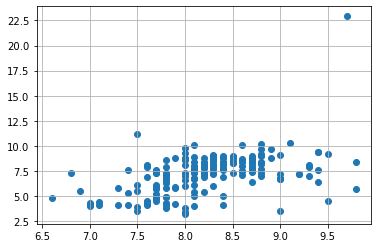

In [6]:
plt.scatter(office_data["Ratings"], office_data["Viewership"])
plt.grid()
plt.show()

There is only 10 million+ views with a rating of 7.5. all the rest are (10M view) is 8.0 and above.And only one episod view is 22M+.

In [7]:
colors = ["red", "orange", "lightgreen", "darkgreen"]

ratings = office_data["Ratings"]
q1 = ratings.quantile(0.25)
q2 = ratings.quantile(0.50)
q3 = ratings.quantile(0.75)
q4 = ratings.max()

quantile_list = [q1, q2, q3, q4]
quantile_list

[7.8, 8.2, 8.6, 9.8]

In [8]:
ratings_color = {}

for i in range(len(quantile_list)):
    ratings_color[quantile_list[i]] = colors[i]
ratings_color

{7.8: 'red', 8.2: 'orange', 8.6: 'lightgreen', 9.8: 'darkgreen'}

That tells us rating under 7.8 is red, between 7.8 & 8.2 is orange, between 8.2 & 8.6 is lightgreen etc.

In [9]:
def colorize(rating, ratings_color):
    for key in ratings_color:
        if float(key) >= rating:
            return ratings_color[key]

In [10]:
office_data['Coloring'] = office_data['Ratings'].apply(colorize, args = (ratings_color, ))

office_data['Episodes'] = np.arange(1, 189)    
office_data.head()

,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,Coloring,Episodes
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,red,1
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,lightgreen,2
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,red,3
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,orange,4
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,lightgreen,5


## 5. Most Viewed Show

In [11]:
max_index = office_data['Viewership'].idxmax()
    
most_popular = office_data.loc[max_index]
most_popular

Season                                                          5
EpisodeTitle                                        Stress Relief
About           Dwight's too-realistic fire alarm gives Stanle...
Ratings                                                       9.7
Votes                                                        8170
Viewership                                                  22.91
Duration                                                       60
Date                                              1 February 2009
GuestStars              Cloris Leachman, Jack Black, Jessica Alba
Director                                            Jeffrey Blitz
Writers                                          Paul Lieberstein
Coloring                                                darkgreen
Episodes                                                       78
Name: 77, dtype: object

The most viewed episode title is Stress Relief. Viewed 22.91M. And the GuestStars are Cloris Leachman, Jack Black, Jessica Alba.

## 6. Creating Two Subsets for Ploting

In [14]:
# filter data that have NAN value 
no_starguest_df = office_data[office_data['GuestStars'].isnull()] 
no_starguest_df.head()

,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,Coloring,Episodes
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,red,1
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,lightgreen,2
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,red,3
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,orange,4
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,lightgreen,5


In [15]:
# filter data that have not NAN value
starguest_df = office_data[office_data['GuestStars'].notna()]
starguest_df.head()

,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,Coloring,Episodes
5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.8,23,26 April 2005,Amy Adams,Amy Heckerling,Mindy Kaling,red,6
8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.3,22,4 October 2005,Nancy Carell,Paul Feig,Michael Schur,lightgreen,9
9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.6,22,11 October 2005,Amy Adams,Ken Kwapis,B. J. Novak,lightgreen,10
12,2,The Client,With Michael and Jan Levinson-Gould away from ...,8.6,3533,7.5,22,8 November 2005,Tim Meadows,Greg Daniels,Paul Lieberstein,lightgreen,13
14,2,E-Mail Surveillance,Michael decides to set up e-mail surveillance ...,8.4,3338,8.1,23,22 November 2005,Ken Jeong,Paul Feig,Jennifer Celotta,lightgreen,15


## 7. Plot the data

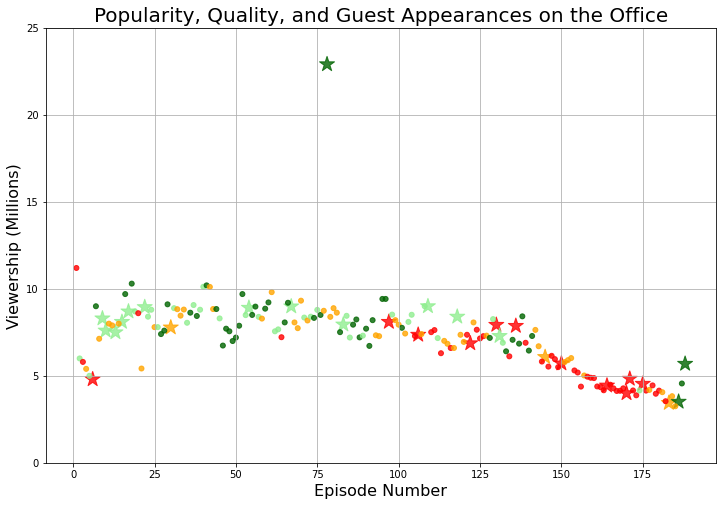

In [16]:
fig = plt.figure(figsize=(12,8))
plt.scatter(
    starguest_df['Episodes'],
    starguest_df['Viewership'], 
    c=starguest_df['Coloring'],  
    s=250, 
    marker = "*",
    alpha = 0.8)
    
plt.scatter(
    no_starguest_df['Episodes'],
    no_starguest_df['Viewership'], 
    c=no_starguest_df['Coloring'],  
    s=25, 
    marker = "o",
    alpha = 0.8)
    
plt.xlabel("Episode Number", fontsize=16)
plt.ylabel("Viewership (Millions)", fontsize=16)
plt.title("Popularity, Quality, and Guest Appearances on the Office", fontsize = 20)
plt.grid()
plt.yticks([0,5,10,15,20,25])
plt.show()

The most popular episode was in Season 5 (episode 78). Viewed 22.91M. The GuestStars are Cloris Leachman, Jack Black, Jessica Alba.Ratings 9.7.